In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras import datasets

In [3]:
mnist=datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
class_name=["zero","one","two","three","four","five","six","seven","eight","nine"]

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 0, 'five')

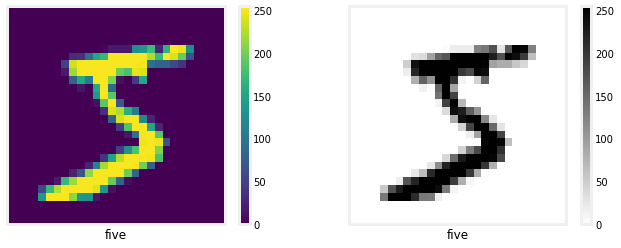

In [5]:
i=0
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])
plt.subplot(1,2,2)
plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])

In [6]:
train_images=train_images/255
test_images=test_images/255

Text(0.5, 0, 'zero')

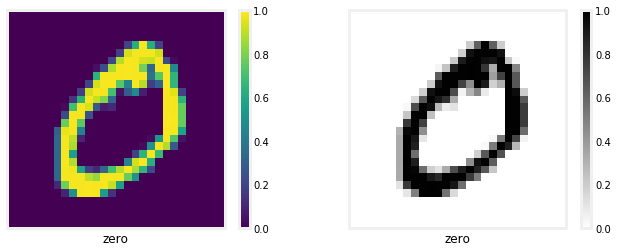

In [7]:
i=1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])
plt.subplot(1,2,2)
plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])

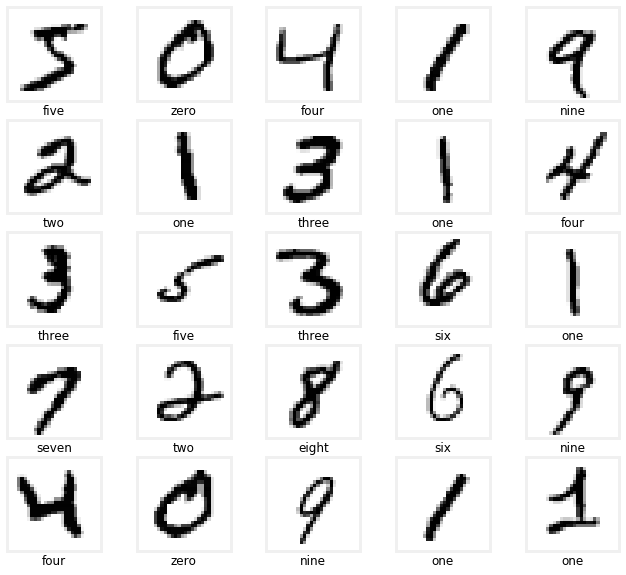

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
encoding=OneHotEncoder()
train_labels1=encoding.fit_transform(np.array(train_labels).reshape(-1,1))
test_labels1=encoding.fit_transform(np.array(test_labels).reshape(-1,1))
print(train_labels[0])
print(train_labels1[0].toarray())

5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [11]:
def creatingmodel(optimizer="adam",loss="categorical_crossentropy"):
    model=Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(16,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])
    return model
model=creatingmodel()
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=10)

In [12]:
model.fit(x=train_images,y=train_labels1,
         validation_data=(test_images,test_labels1),
         epochs=100,batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3081 - accuracy: 0.9090 - val_loss: 0.1567 - val_accuracy: 0.9513
Epoch 2/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1167 - accuracy: 0.9652 - val_loss: 0.1172 - val_accuracy: 0.9634
Epoch 3/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0823 - accuracy: 0.9753 - val_loss: 0.0951 - val_accuracy: 0.9707
Epoch 4/100
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0820 - val_accuracy: 0.9731
Epoch 5/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0786 - val_accuracy: 0.9767
Epoch 6/100
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 7/100
60000/60000 [========================

Epoch 55/100
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1525 - val_accuracy: 0.9796
Epoch 56/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.1403 - val_accuracy: 0.9792
Epoch 57/100
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1352 - val_accuracy: 0.9786
Epoch 58/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1539 - val_accuracy: 0.9779
Epoch 59/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.1477 - val_accuracy: 0.9794
Epoch 60/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1597 - val_accuracy: 0.9787
Epoch 61/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0042 - ac

In [13]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.308070,0.909033,0.156689,0.9513
1,0.116677,0.965233,0.117164,0.9634
2,0.082278,0.975250,0.095073,0.9707
3,0.064203,0.980300,0.082029,0.9731
4,0.051930,0.983817,0.078584,0.9767


In [14]:
loss.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.002952,0.999267,0.160827,0.9794
96,0.002655,0.999150,0.170894,0.9795
97,0.002138,0.999500,0.166117,0.9808
98,0.004266,0.998800,0.185760,0.9797
99,0.004850,0.998833,0.168568,0.9803


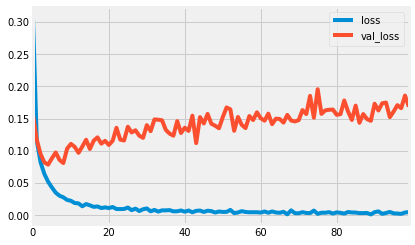

In [15]:
loss[["loss","val_loss"]].plot()

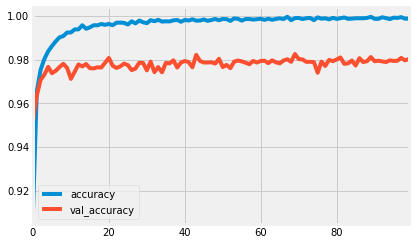

In [16]:
loss[["accuracy","val_accuracy"]].plot()

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
y_pred=model.predict_classes(test_images)
y=test_labels1.toarray()
y_original=np.argmax(y,axis=1)
y_pred_prob=model.predict_proba(test_images)

In [19]:
# analysing the results
print(confusion_matrix(y_original,y_pred))
print(classification_report(y_original,y_pred))

[[ 971    0    0    1    0    1    3    1    3    0]
 [   0 1130    2    2    0    0    1    0    0    0]
 [   3    1 1001    5    3    0    3   10    5    1]
 [   0    1    1  997    0    3    0    3    1    4]
 [   3    1    0    1  965    0    4    5    0    3]
 [   2    2    0    7    0  867    5    2    6    1]
 [   3    2    1    1    2    4  944    0    1    0]
 [   0    5    4    1    0    0    0 1014    2    2]
 [   5    0    1    7    2    4    1    5  944    5]
 [   5    4    0    2    6    7    0   11    4  970]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.96      0.99   

In [20]:
scores=model.evaluate(test_images,test_labels1)
print(model.metrics_names[1],scores[1]*100)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.1686 - accuracy: 0.9803
accuracy 98.03000092506409


In [21]:
wrong_predictions=[]
for i in range(10000):
    if(y_original[i]!=y_pred[i]):
        wrong_predictions.append(i)
wrong_predictions[0:10]

[115, 149, 151, 247, 321, 445, 449, 495, 551, 582]

In [22]:
def plottingphoto(number):
    yp=y_pred[number]
    yo=test_labels[number]
    if yp==yo:
        color="blue"
    else:
        color="red"
    plt.imshow(test_images[number])
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(class_name[yp]+" "+str(round(np.max(y_pred_prob[number])*100,2))+" %",color=color)

In [23]:
def plottingbargraph(number):
    yp=y_pred[number]
    yo=test_labels[number]
    barplot=plt.bar(range(10),y_pred_prob[number],color="black")
    if yp==yo:
        barplot[yp].set_color("blue")
    else:
        barplot[yp].set_color("red")

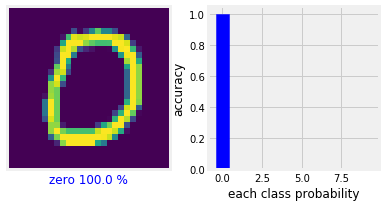

In [24]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(i)
plt.subplot(1,2,2)
plottingbargraph(i)
plt.ylabel("accuracy")
plt.xlabel("each class probability")
plt.show()

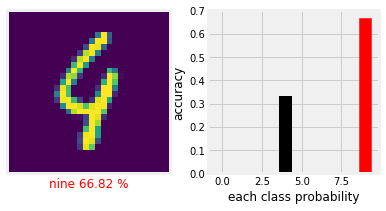

In [25]:
i=115
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(i)
plt.subplot(1,2,2)
plottingbargraph(i)
plt.ylabel("accuracy")
plt.xlabel("each class probability")
plt.show()

In [26]:
print("Total wrong predictions "+ str(len(wrong_predictions)))

Total wrong predictions 197


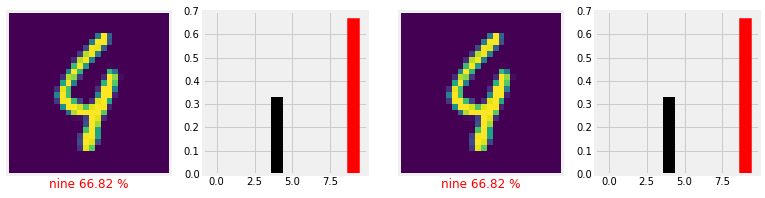

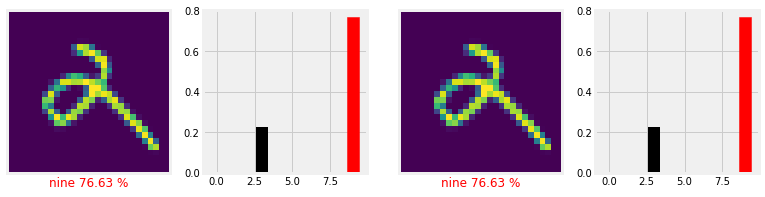

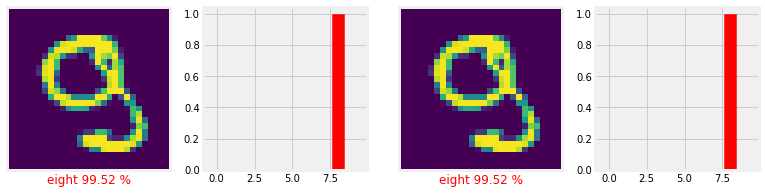

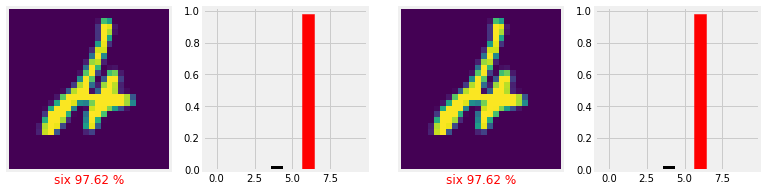

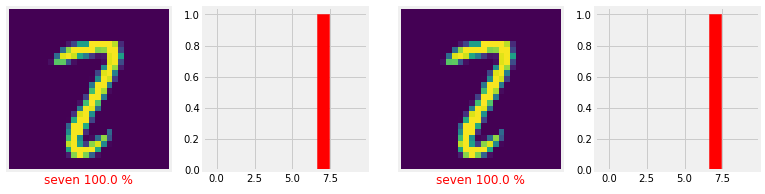

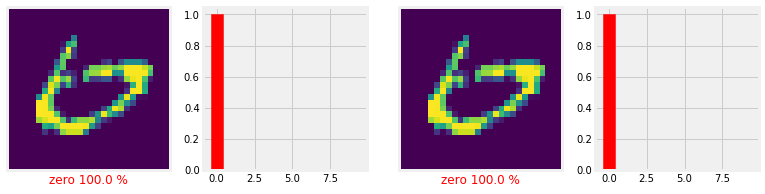

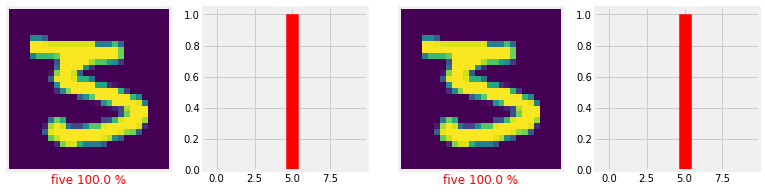

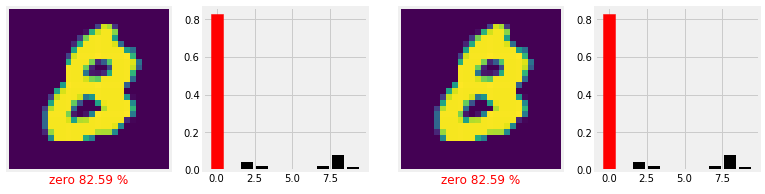

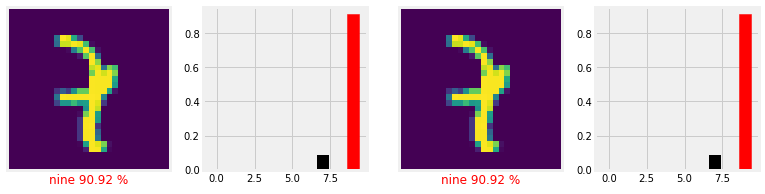

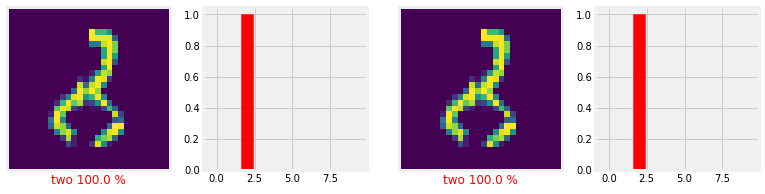

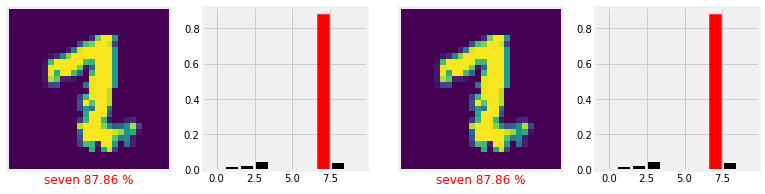

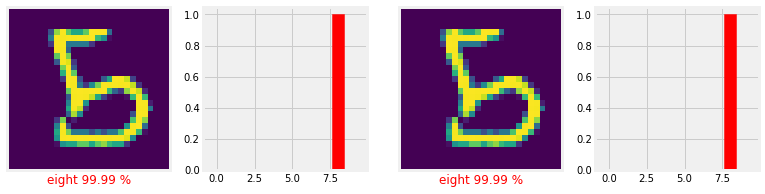

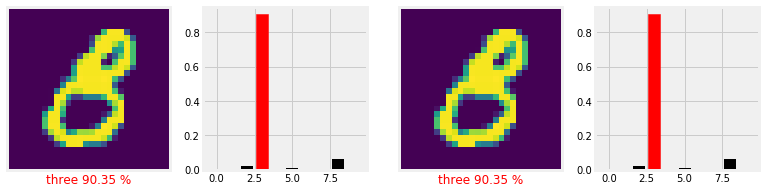

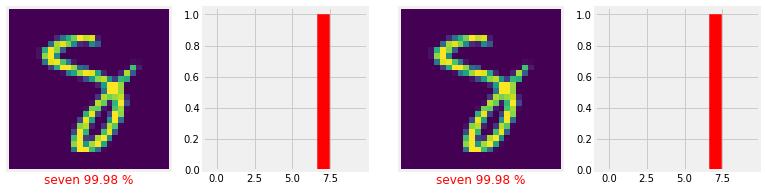

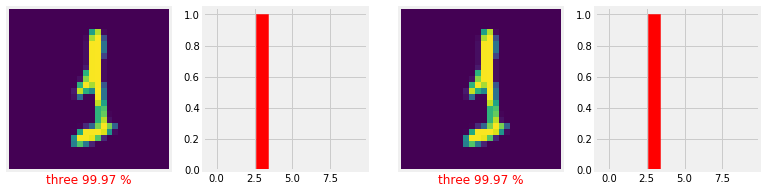

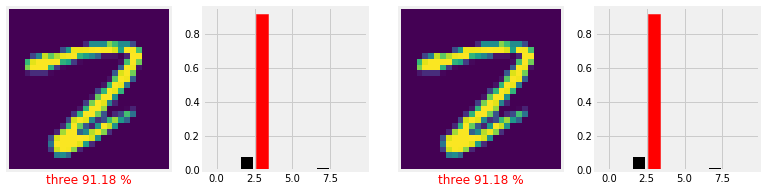

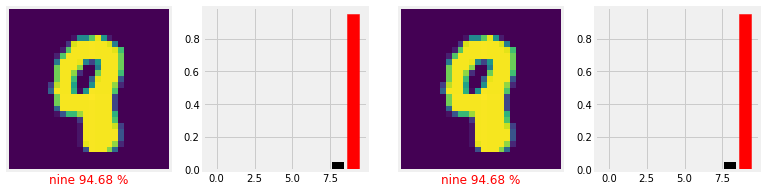

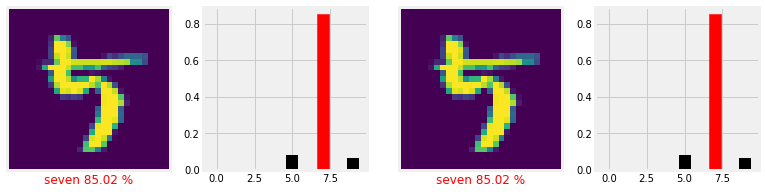

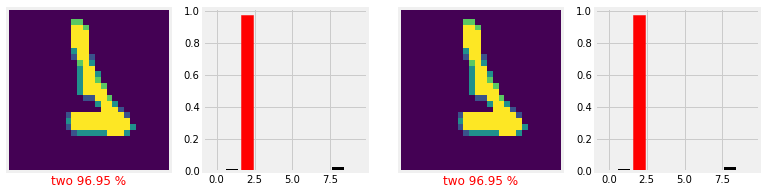

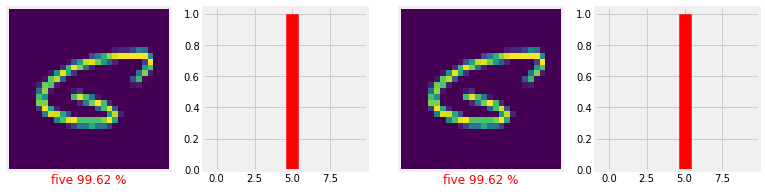

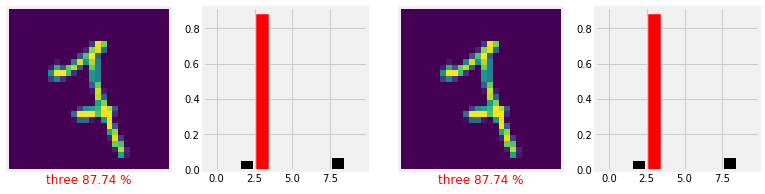

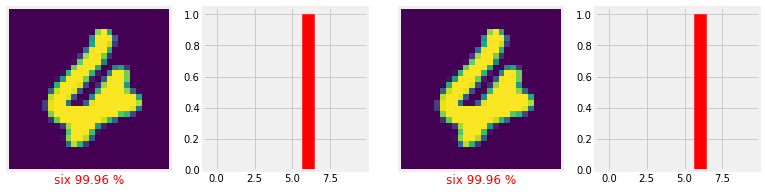

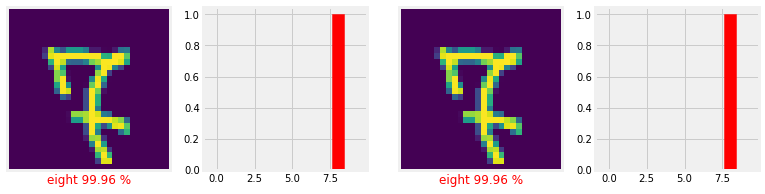

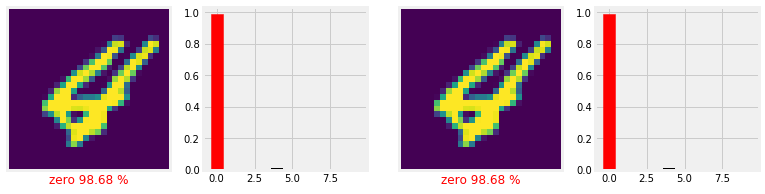

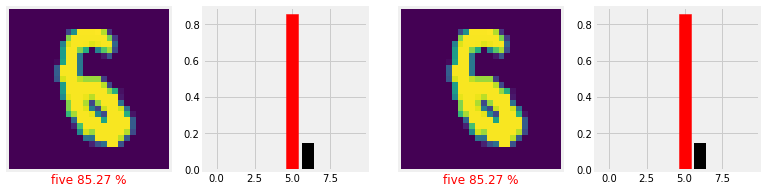

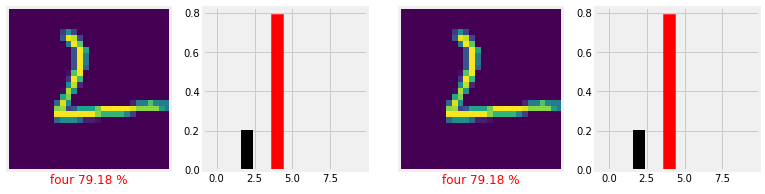

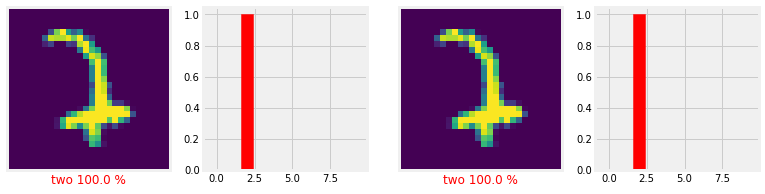

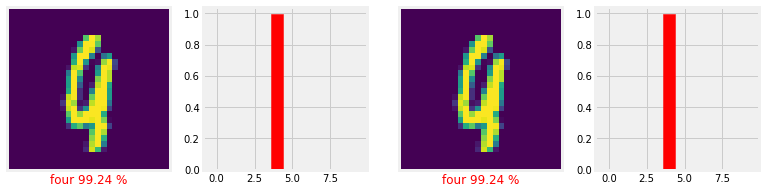

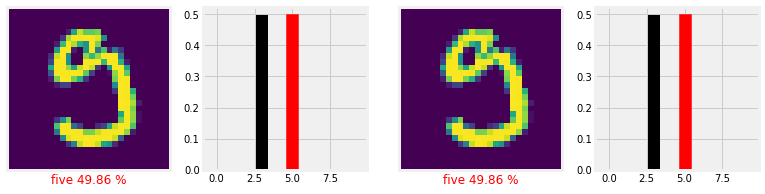

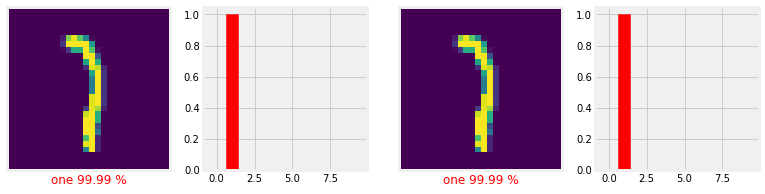

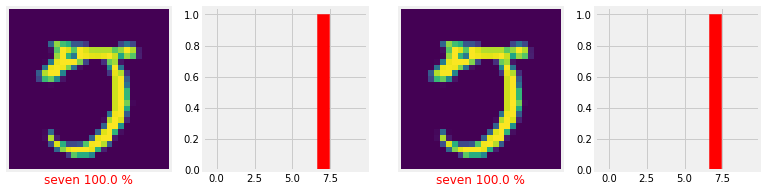

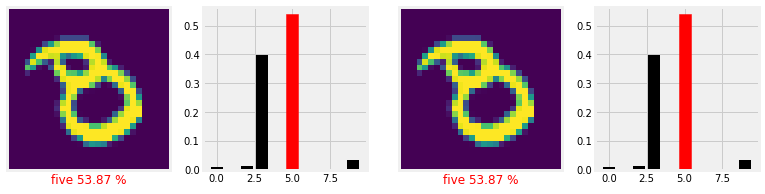

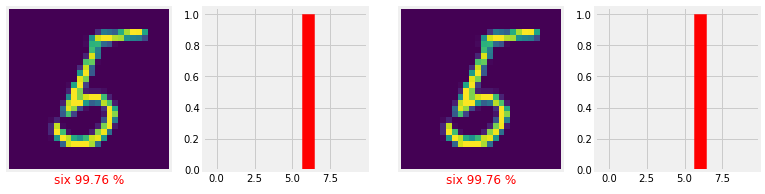

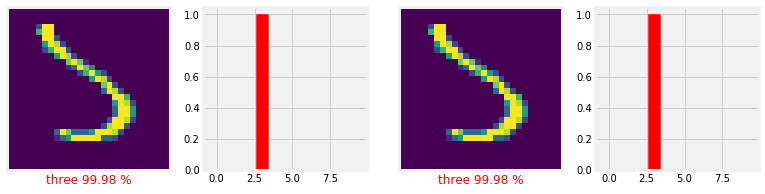

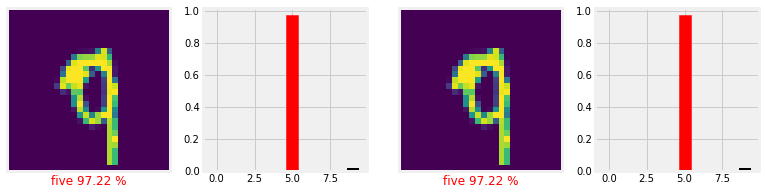

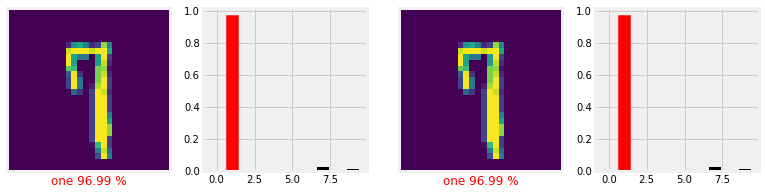

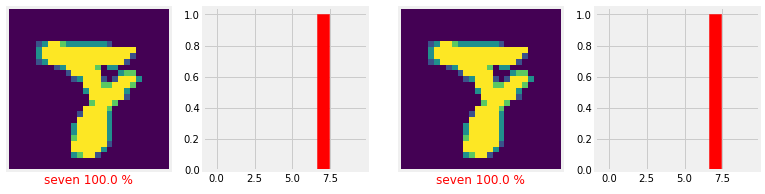

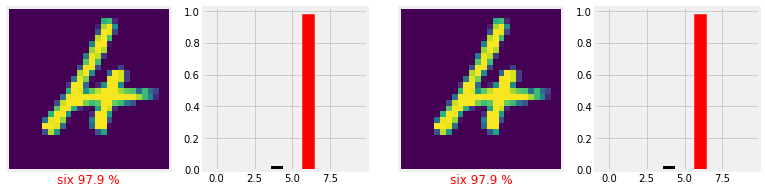

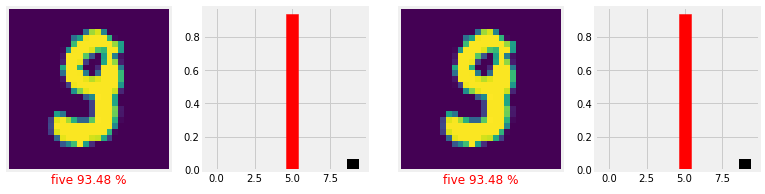

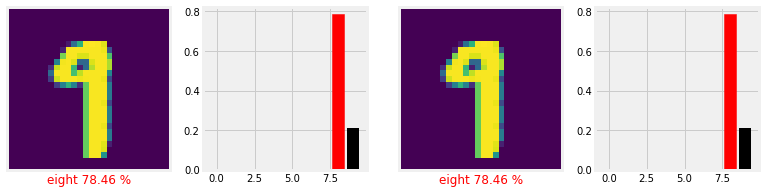

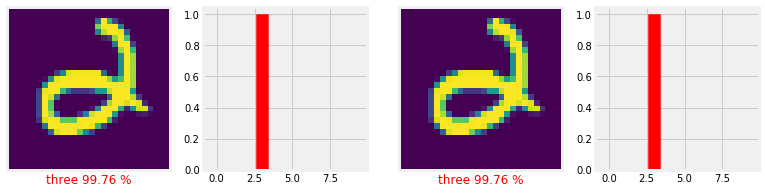

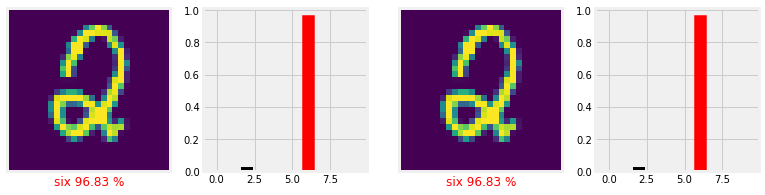

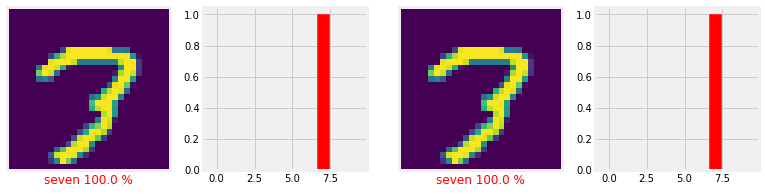

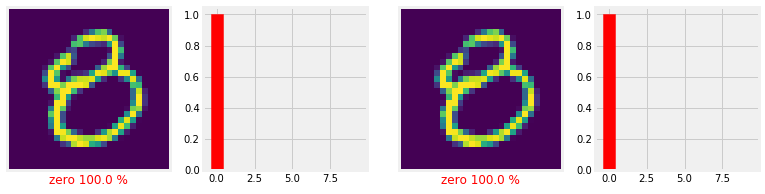

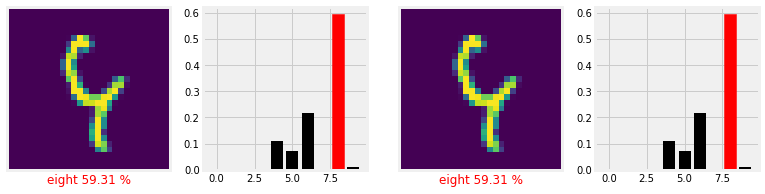

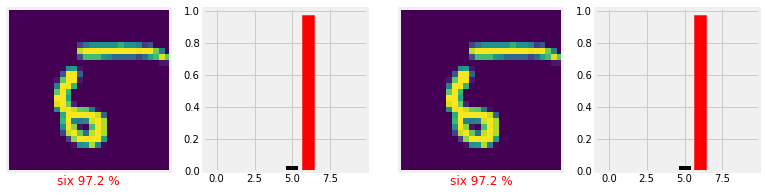

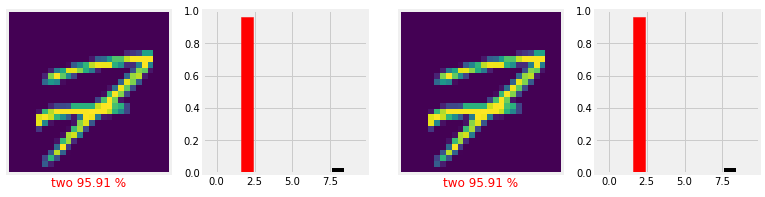

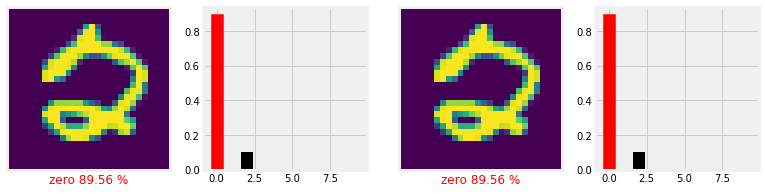

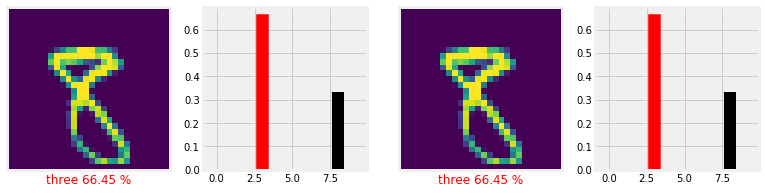

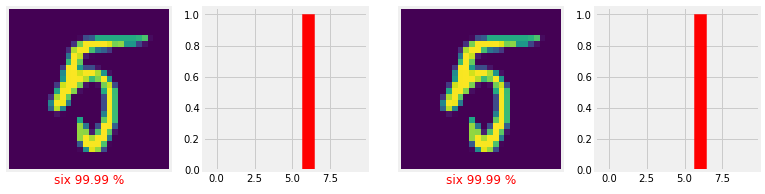

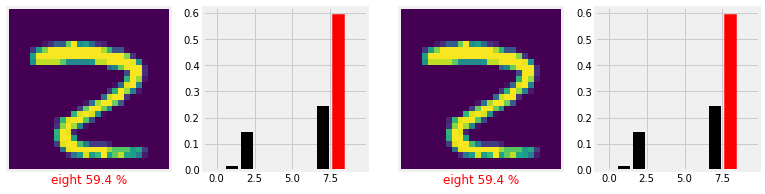

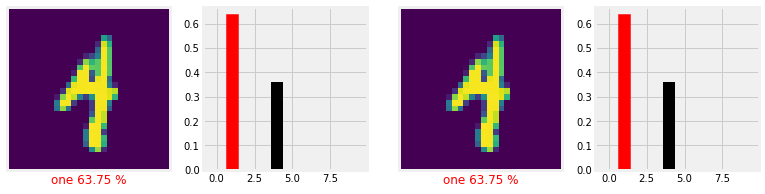

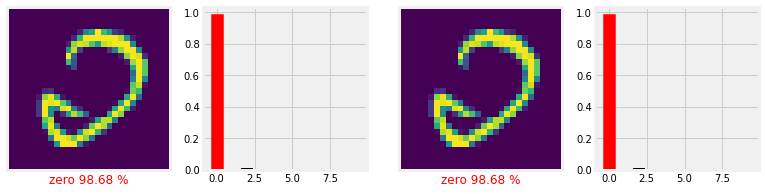

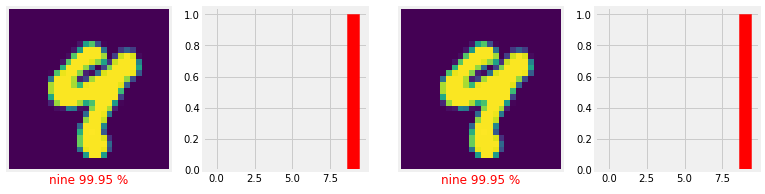

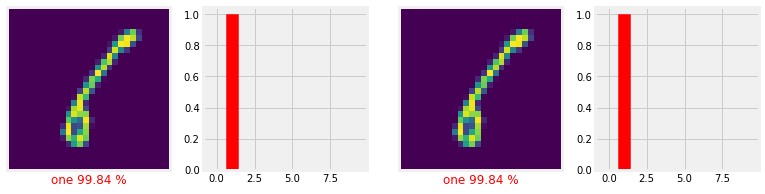

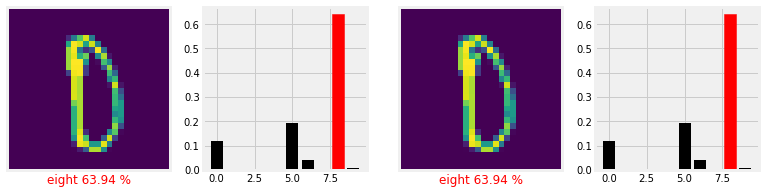

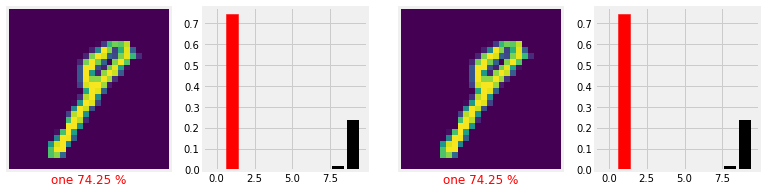

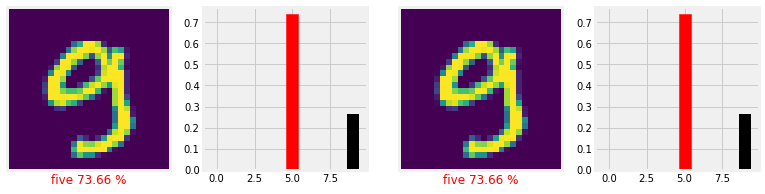

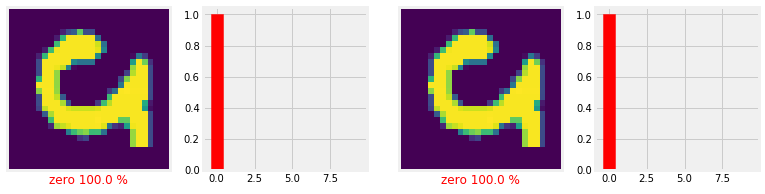

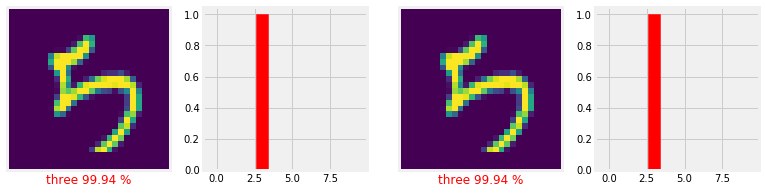

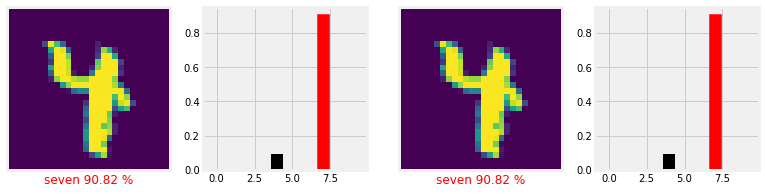

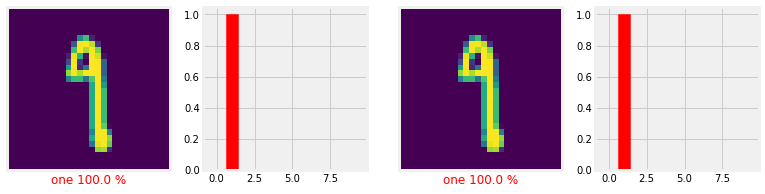

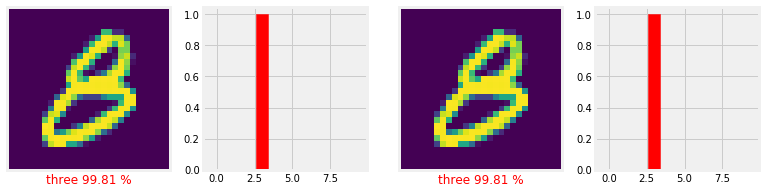

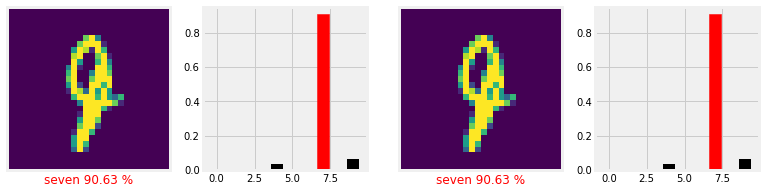

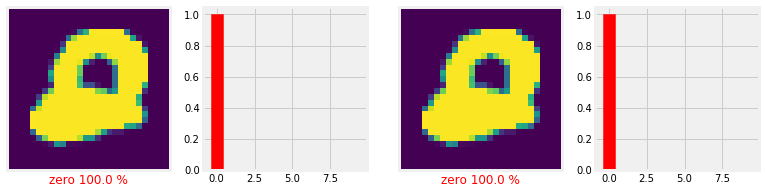

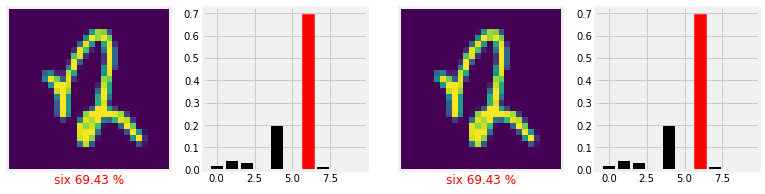

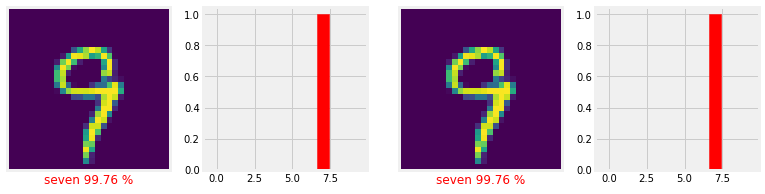

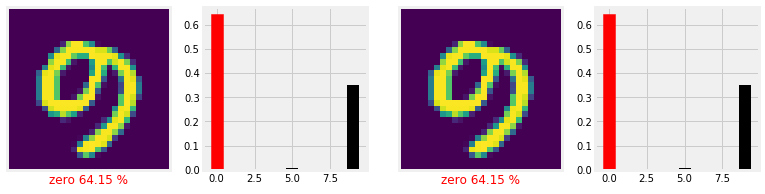

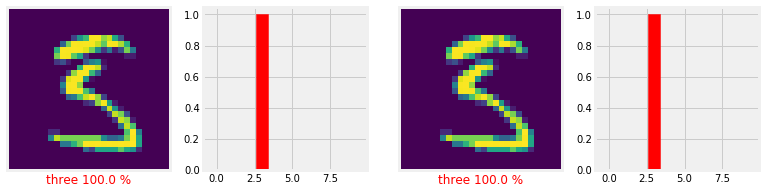

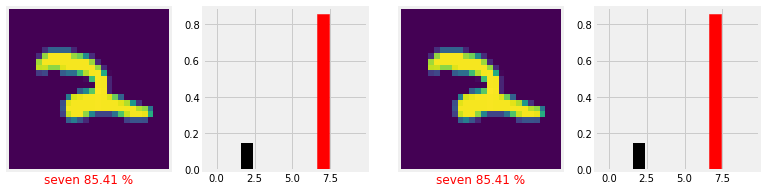

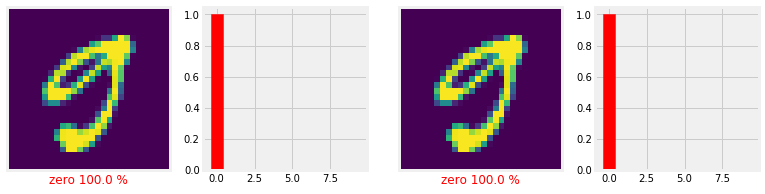

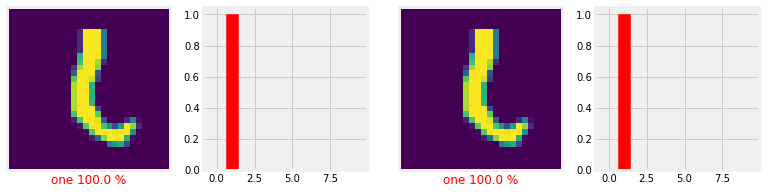

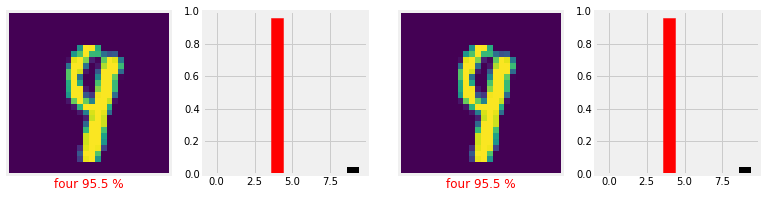

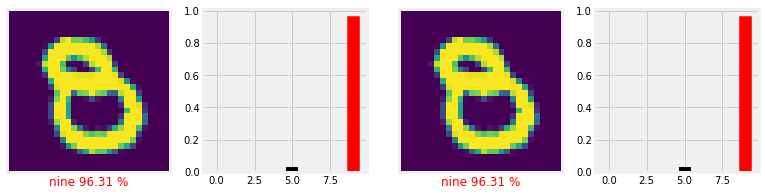

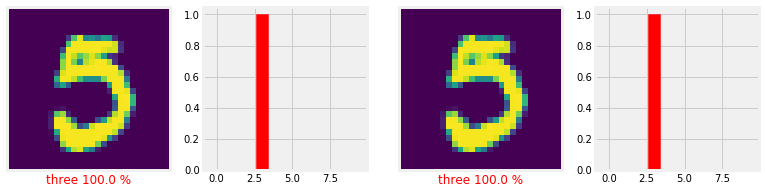

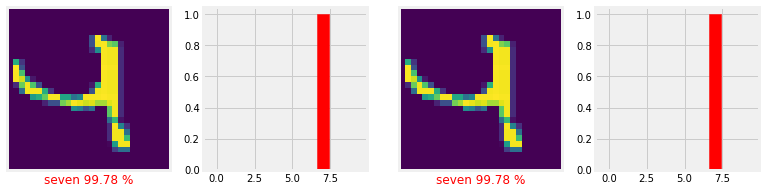

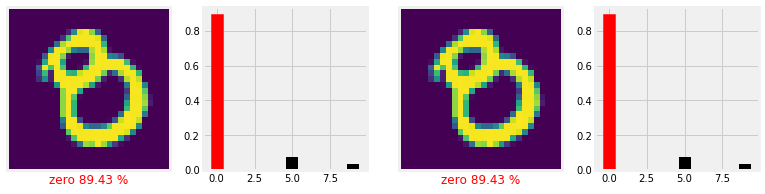

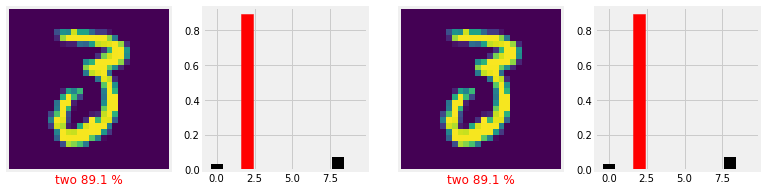

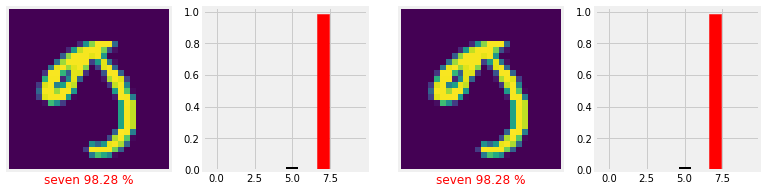

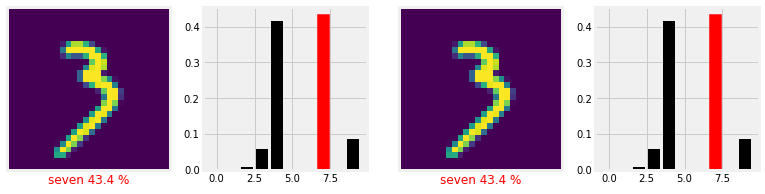

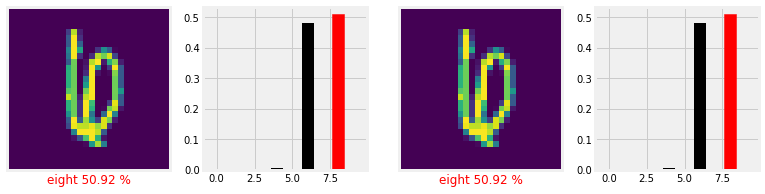

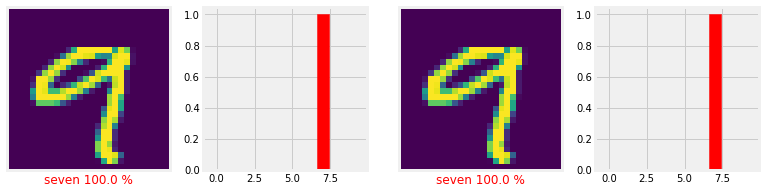

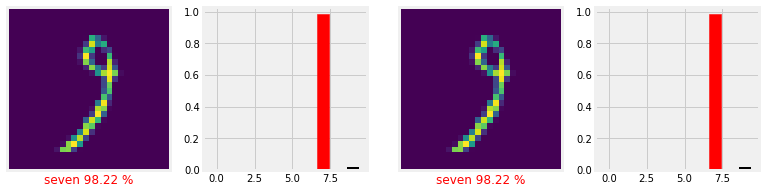

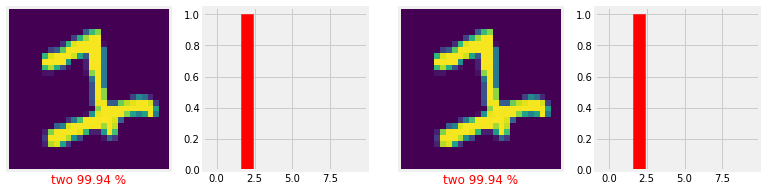

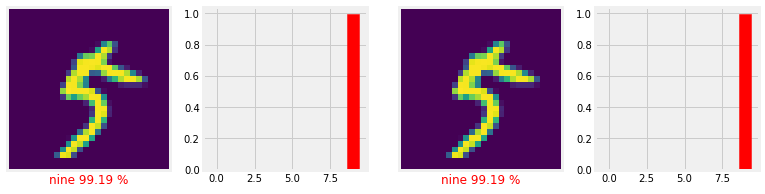

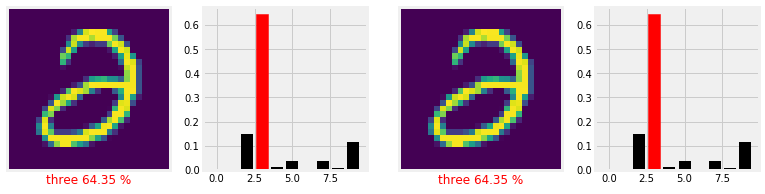

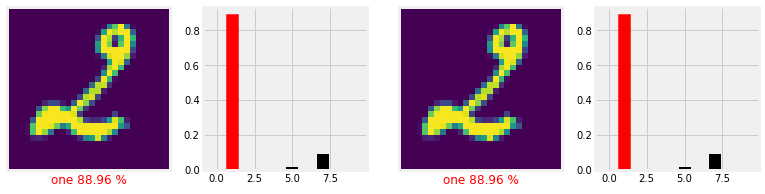

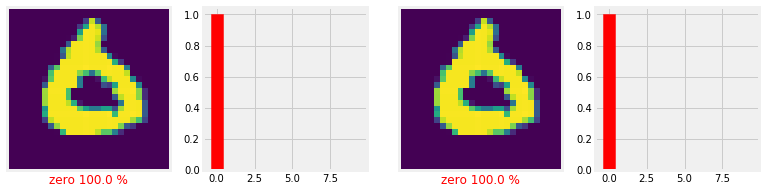

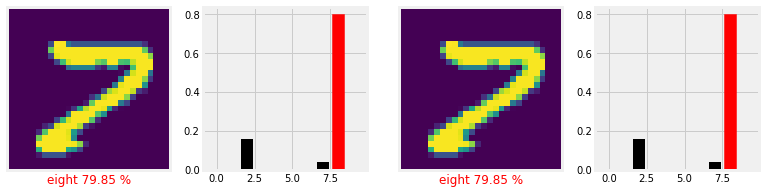

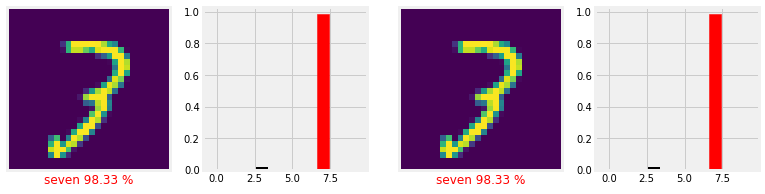

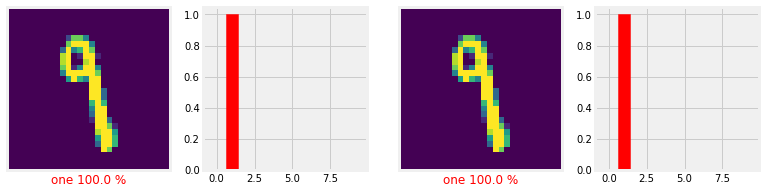

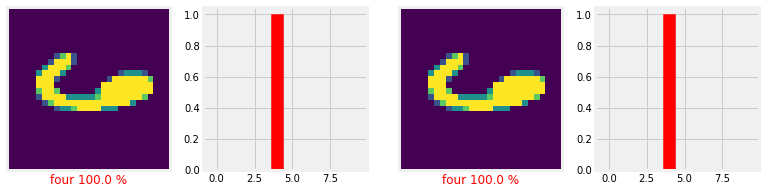

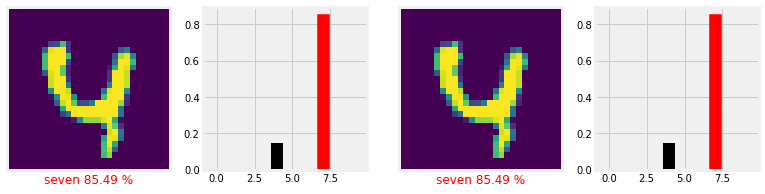

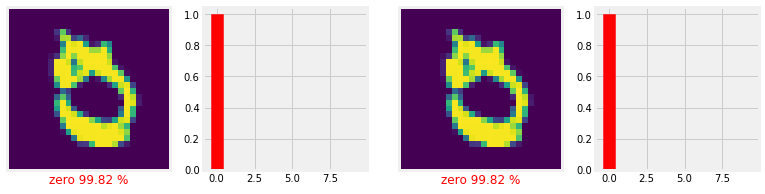

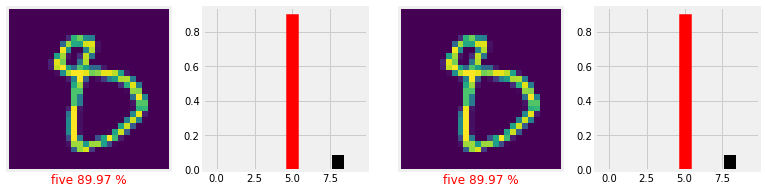

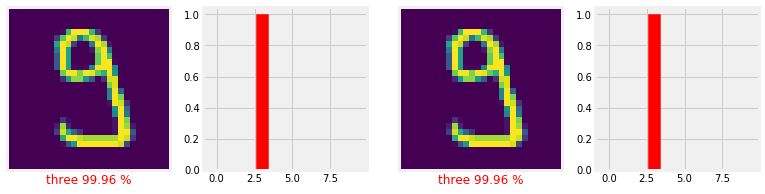

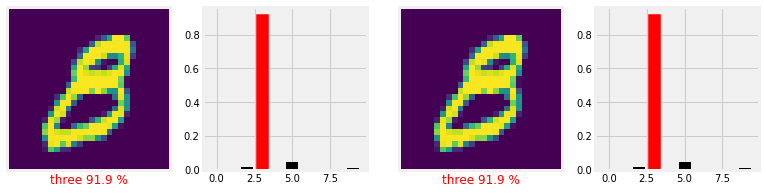

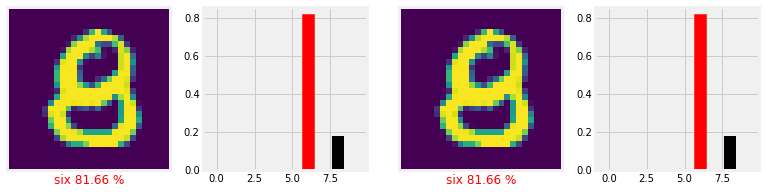

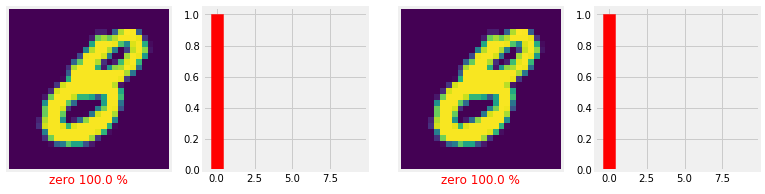

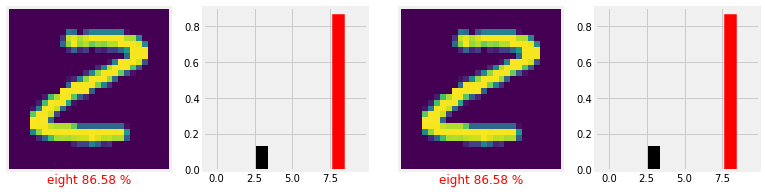

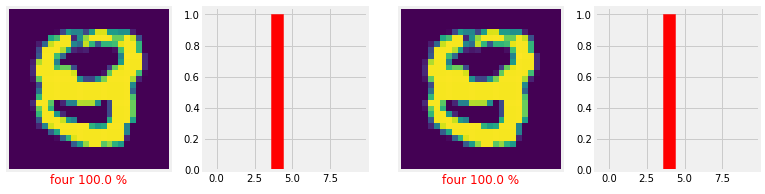

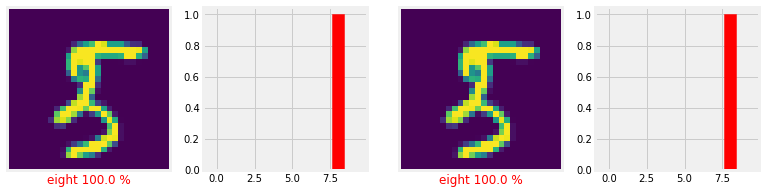

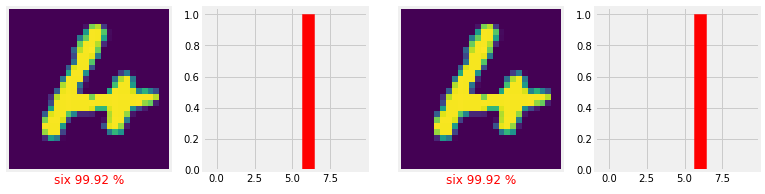

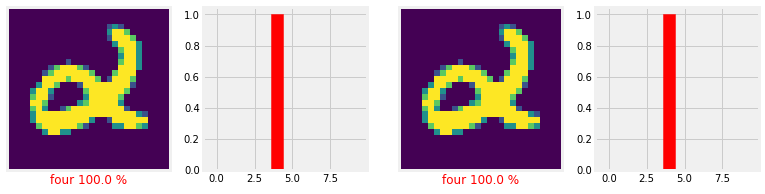

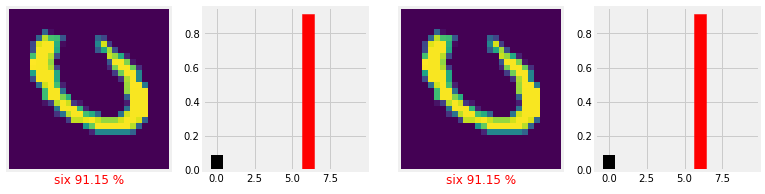

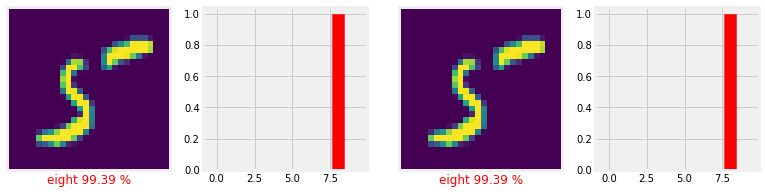

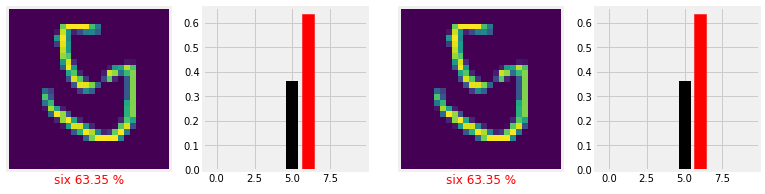

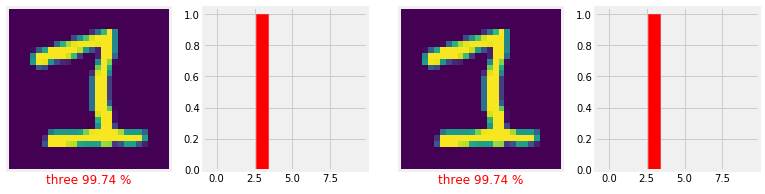

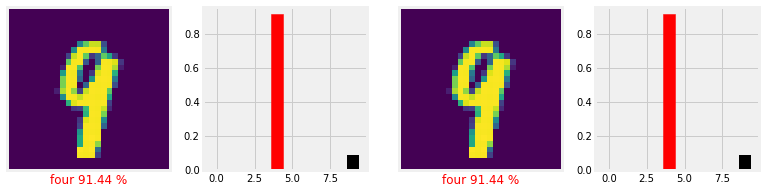

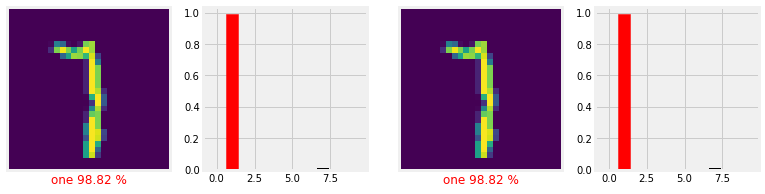

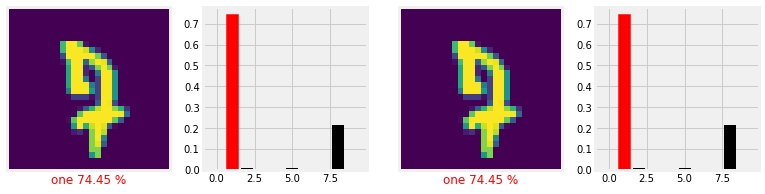

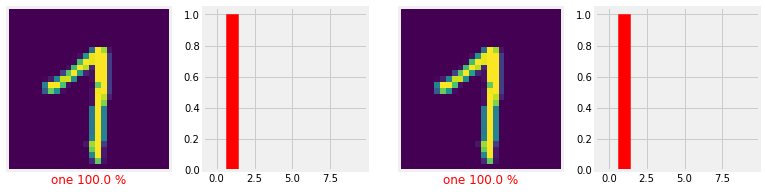

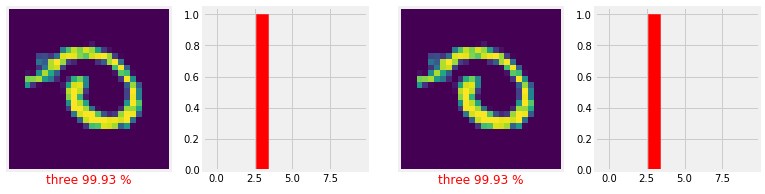

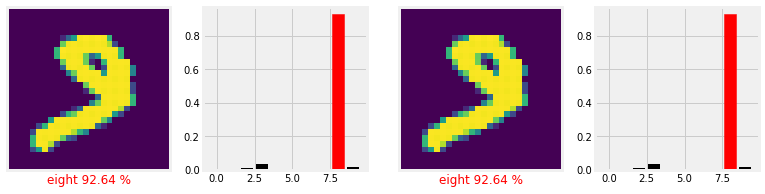

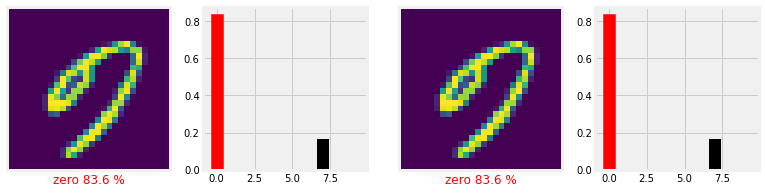

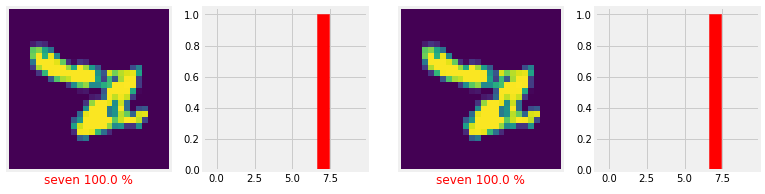

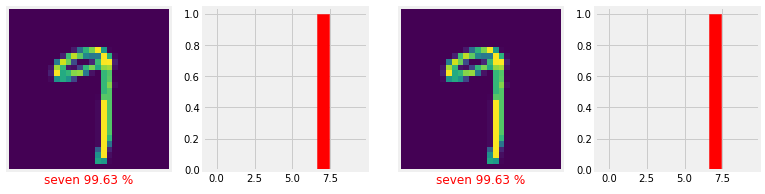

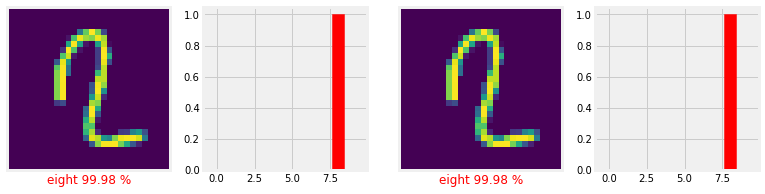

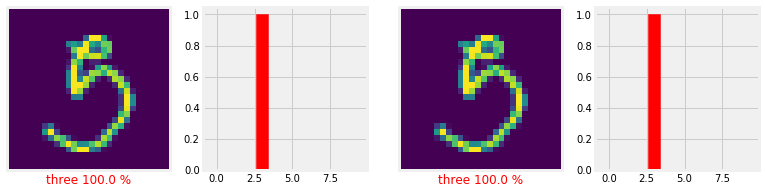

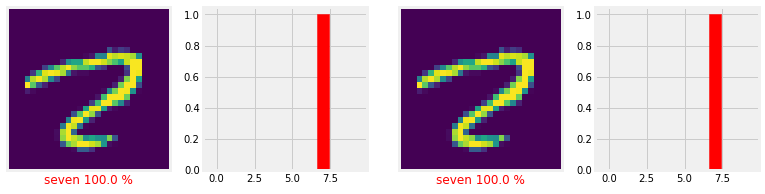

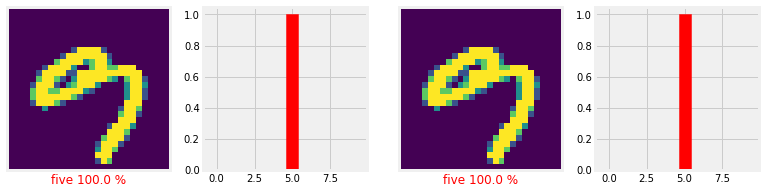

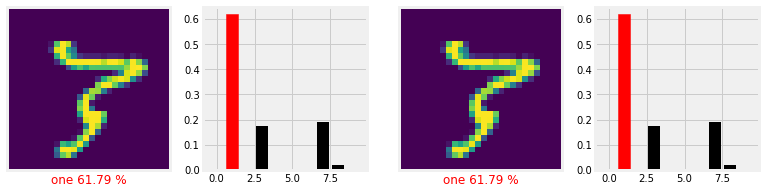

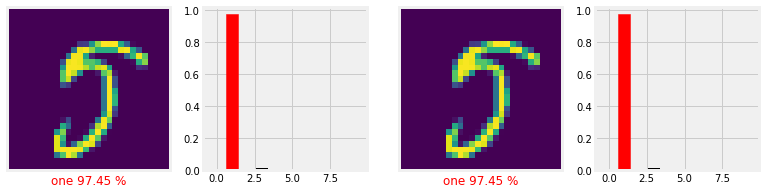

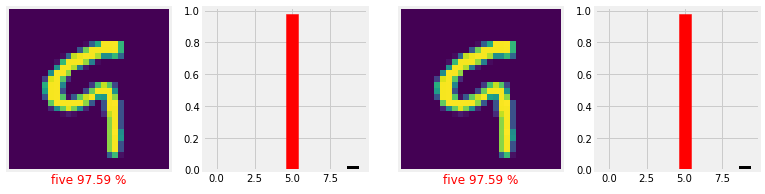

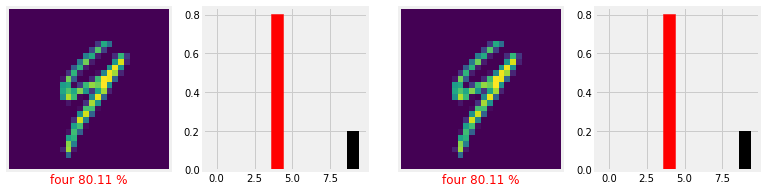

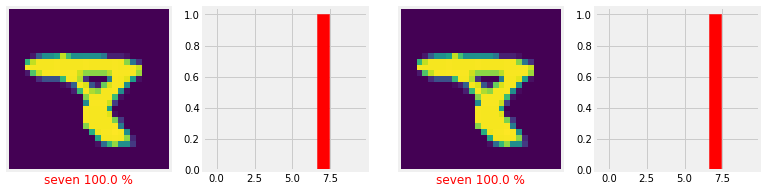

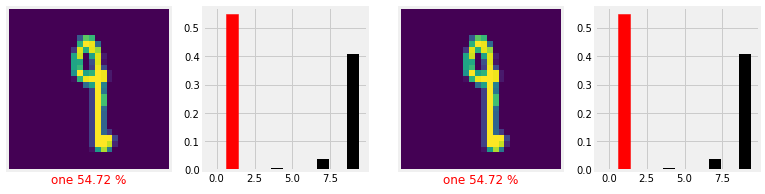

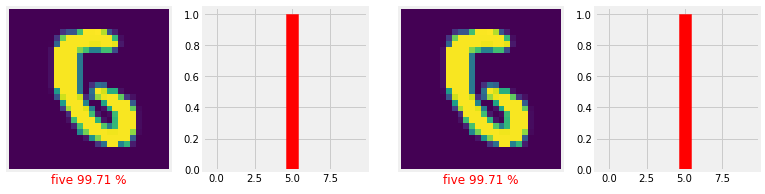

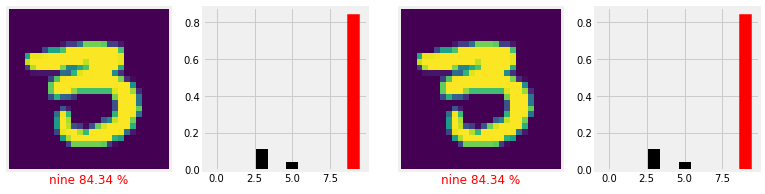

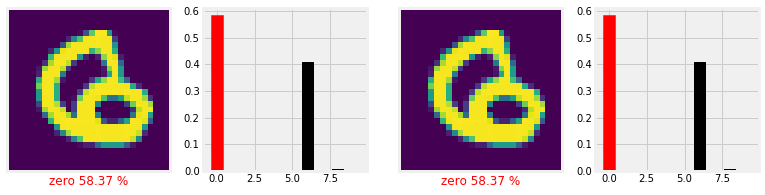

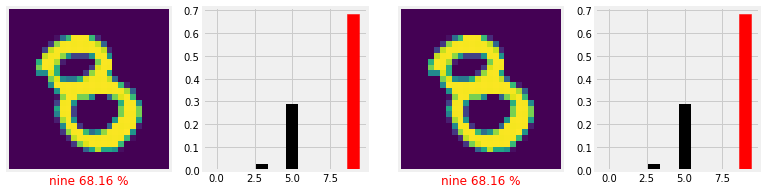

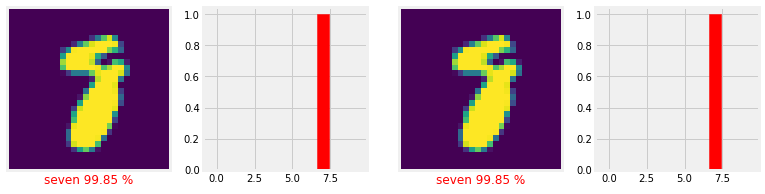

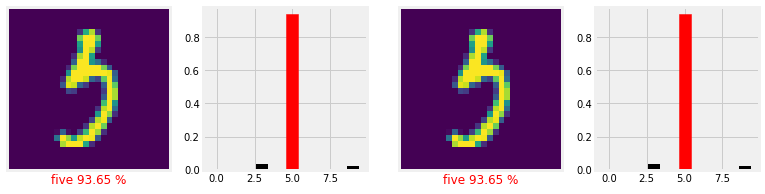

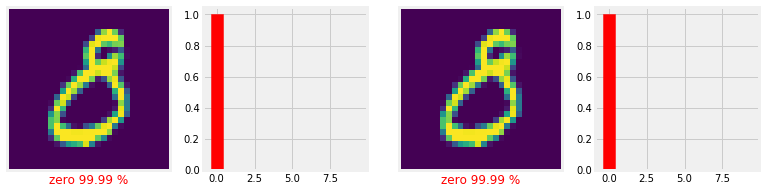

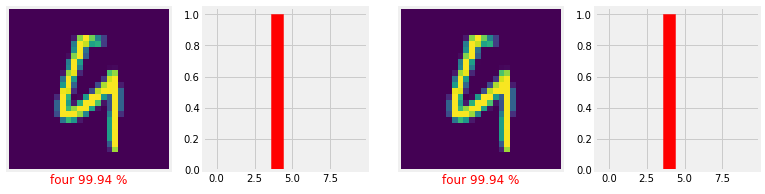

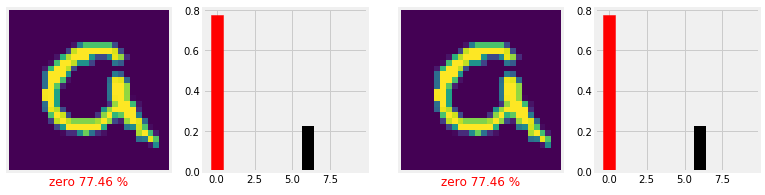

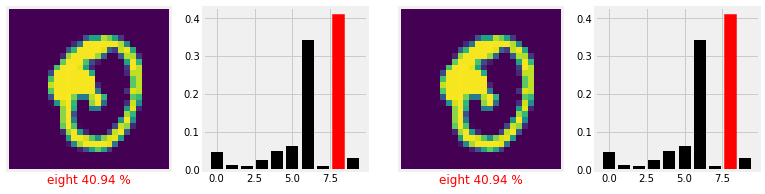

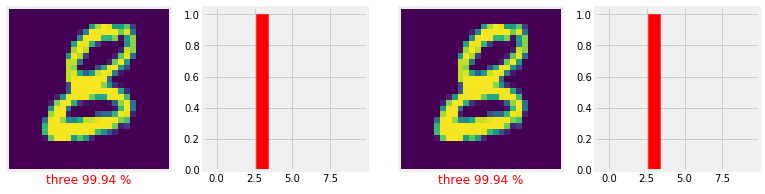

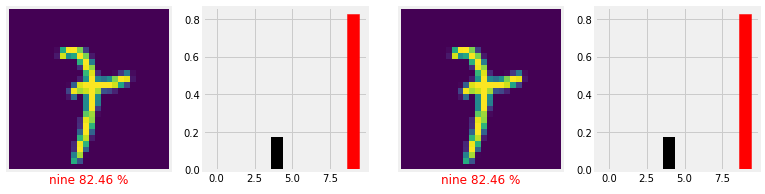

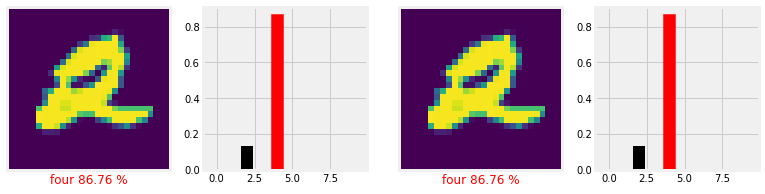

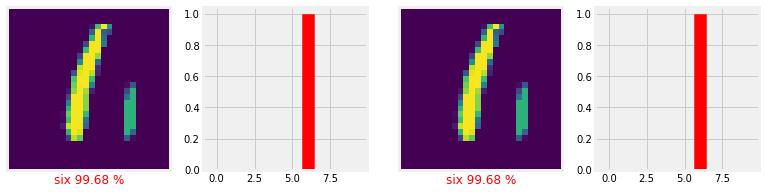

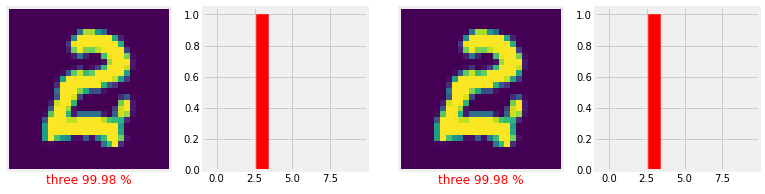

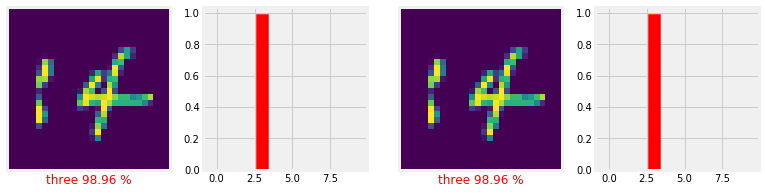

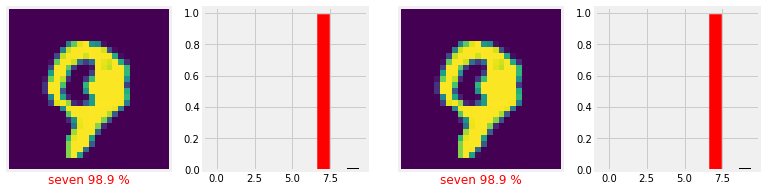

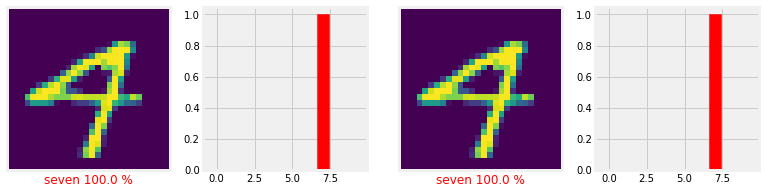

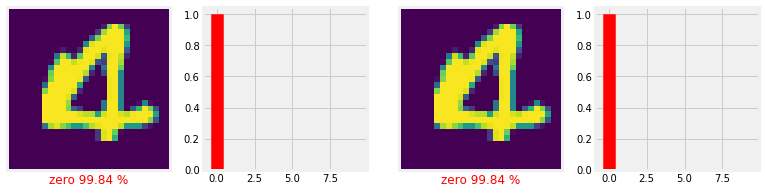

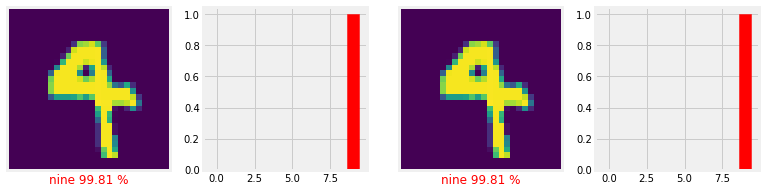

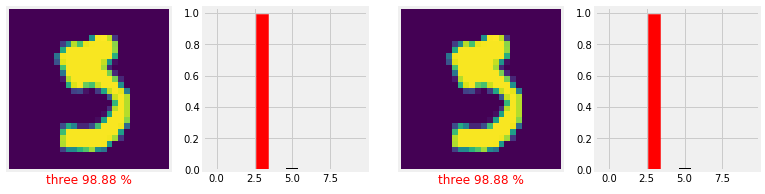

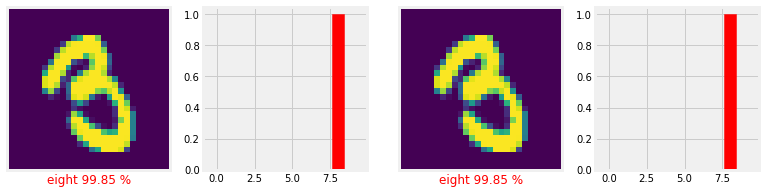

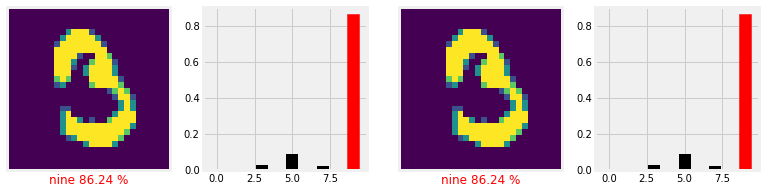

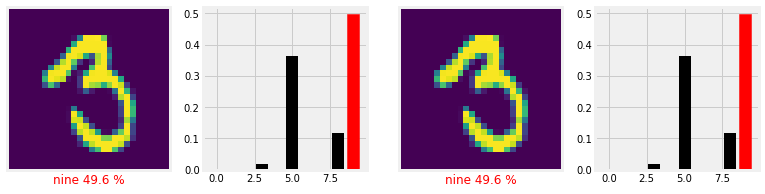

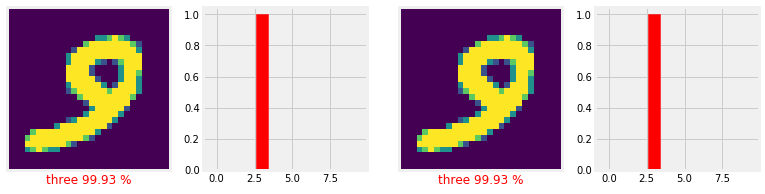

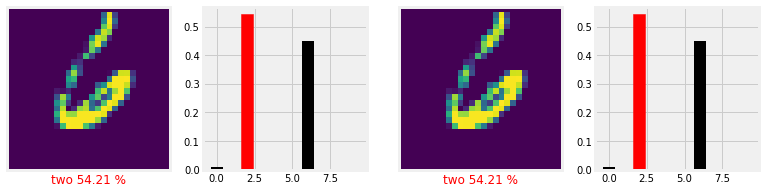

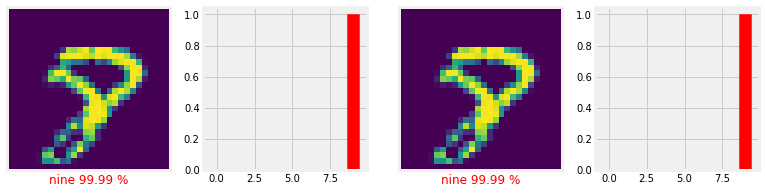

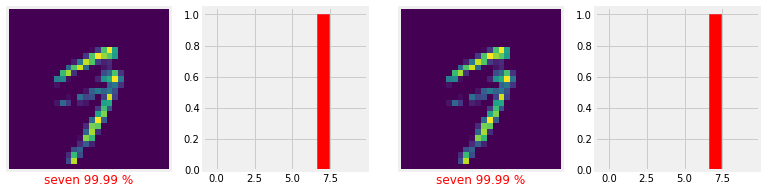

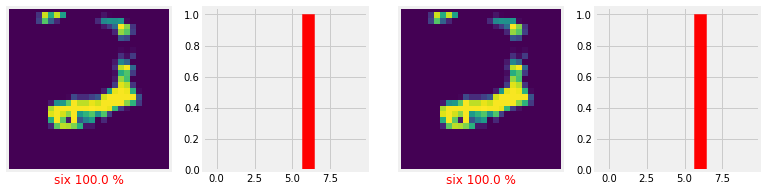

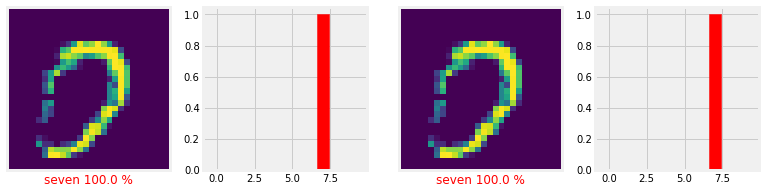

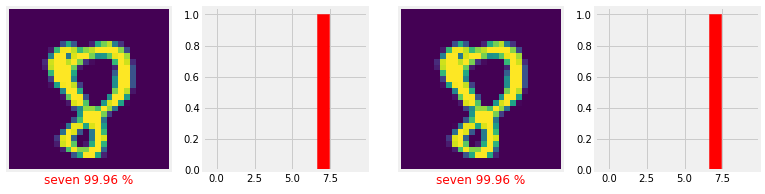

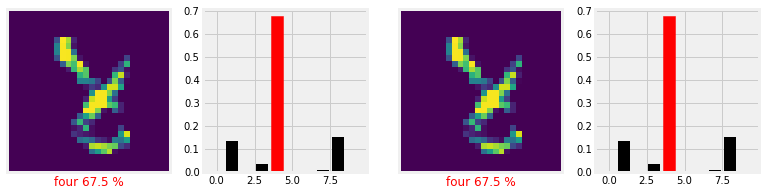

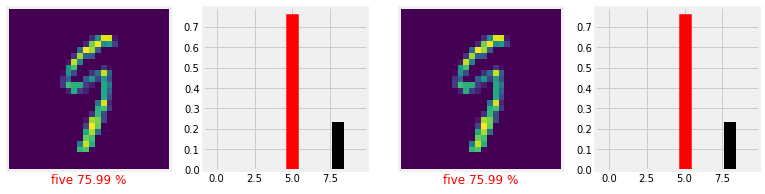

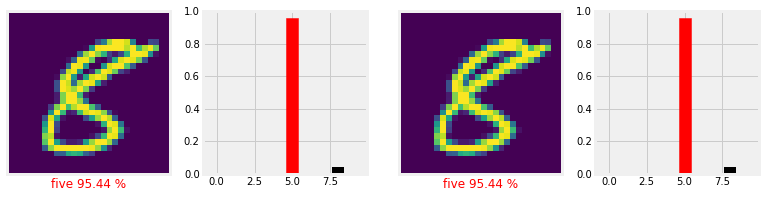

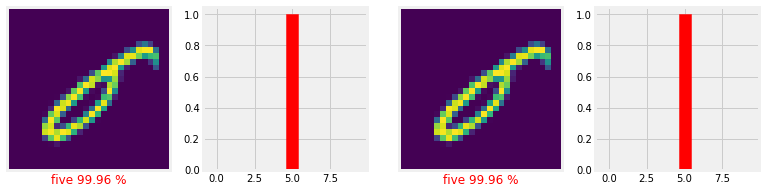

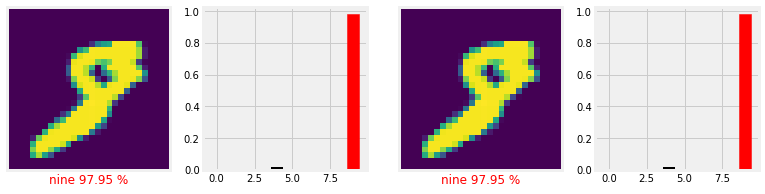

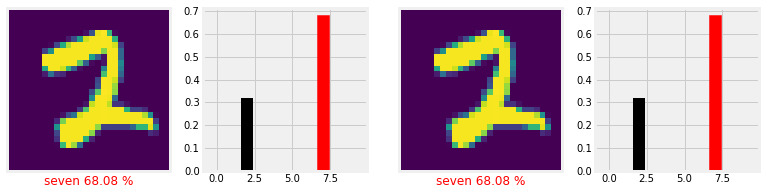

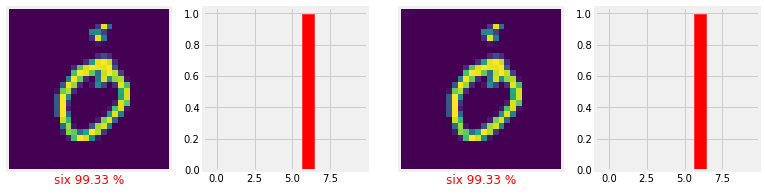

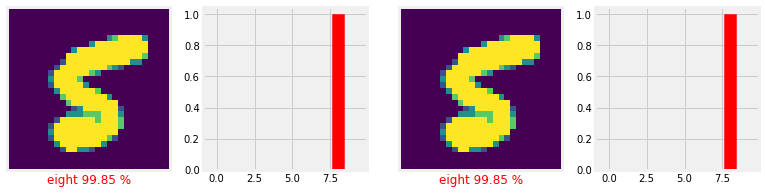

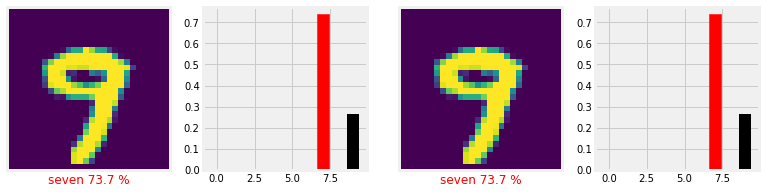

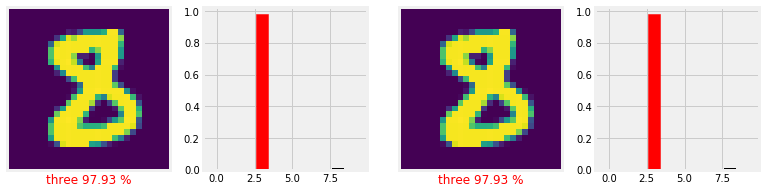

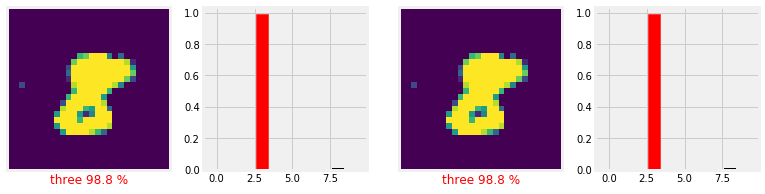

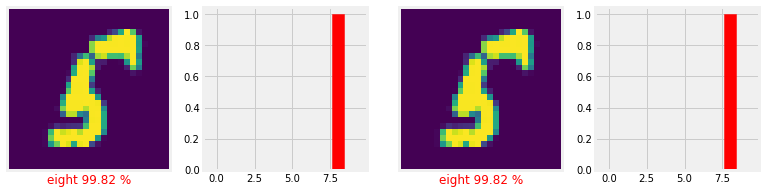

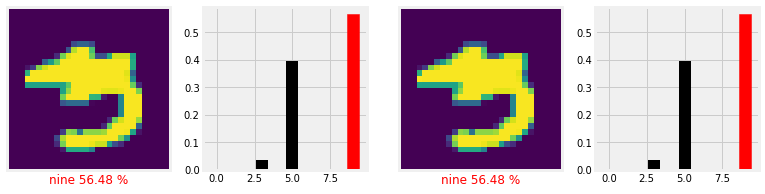

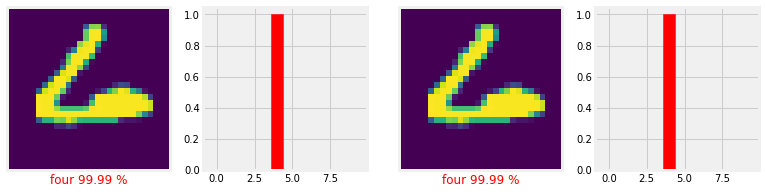

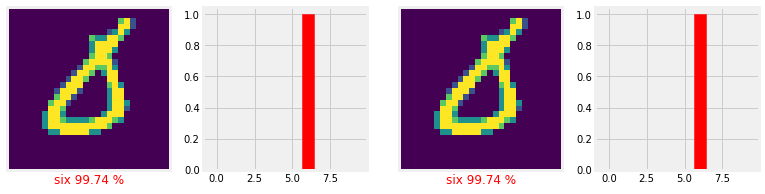

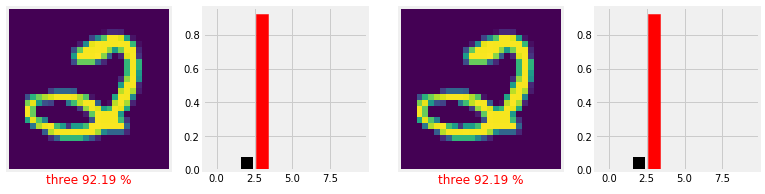

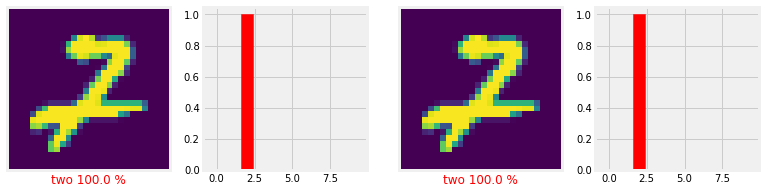

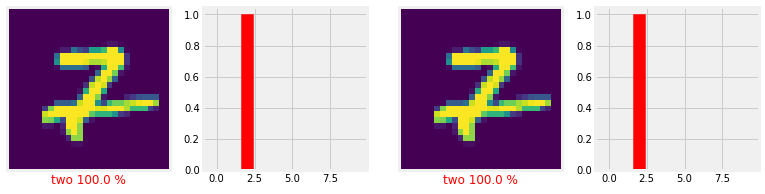

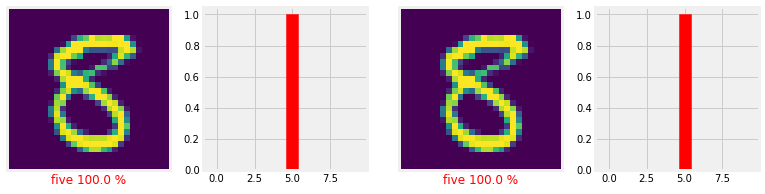

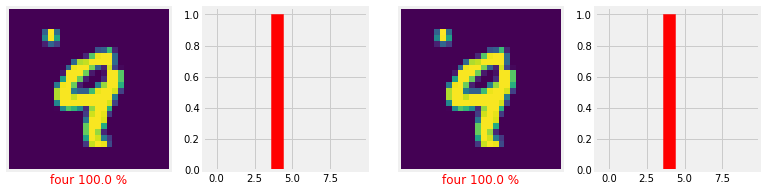

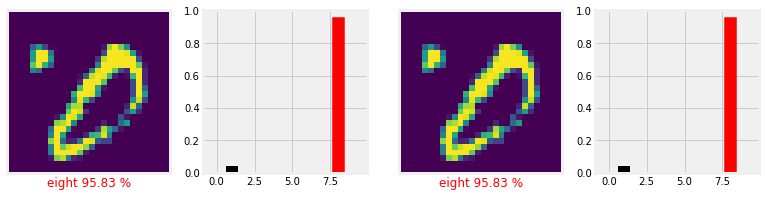

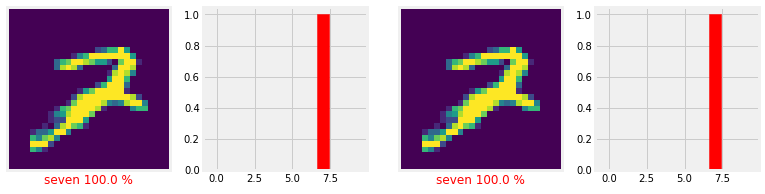

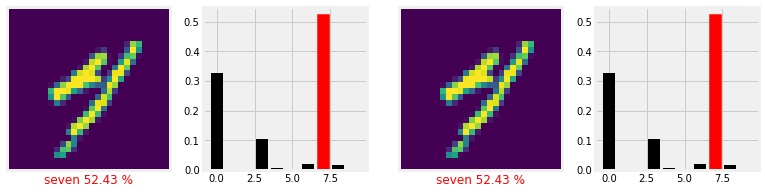

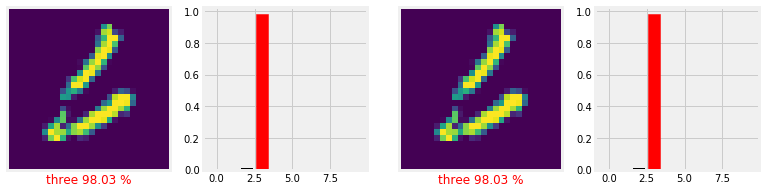

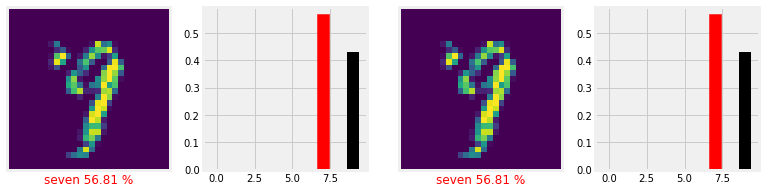

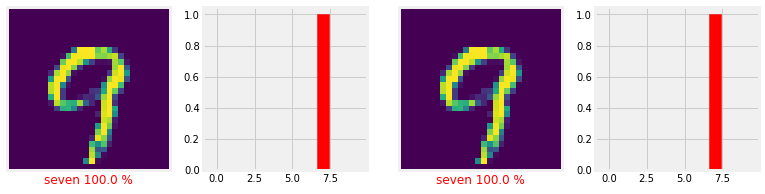

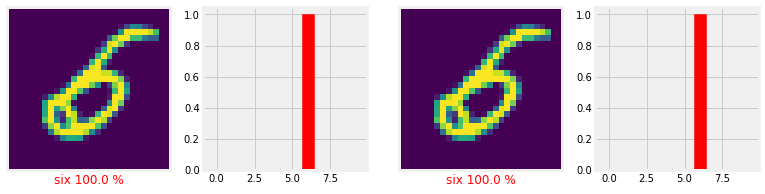

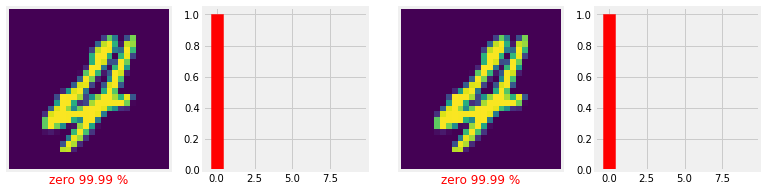

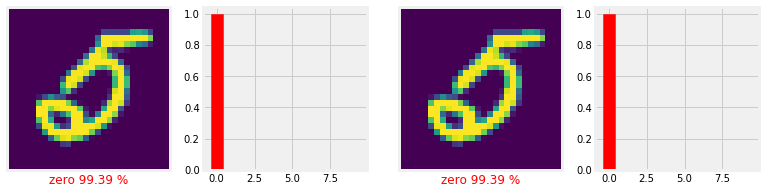

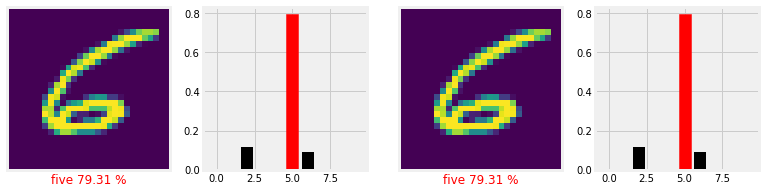

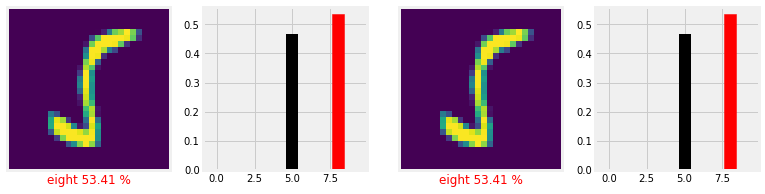

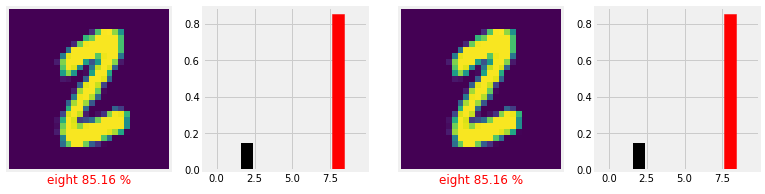

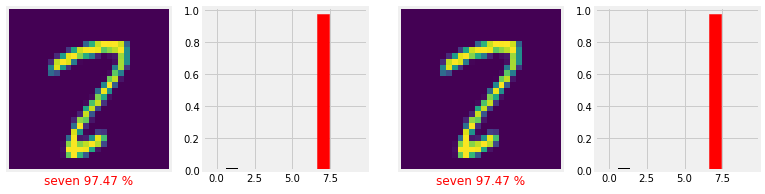

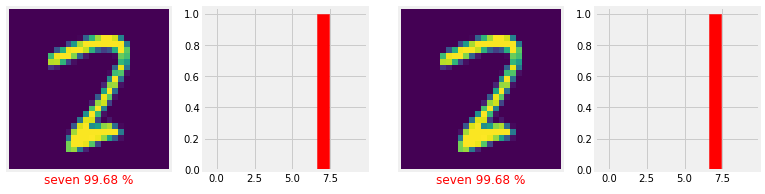

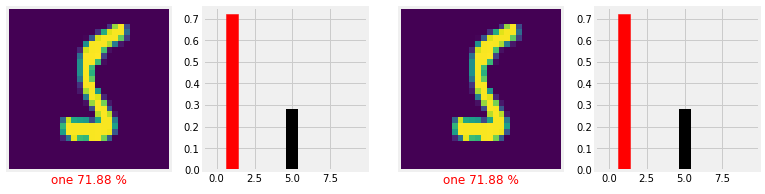

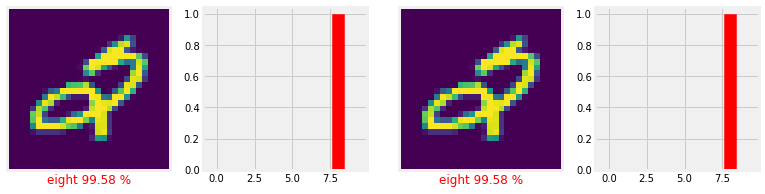

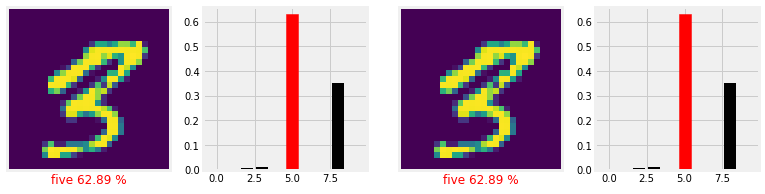

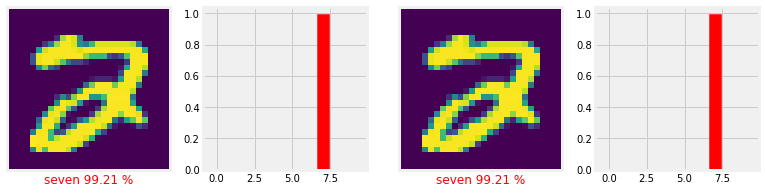

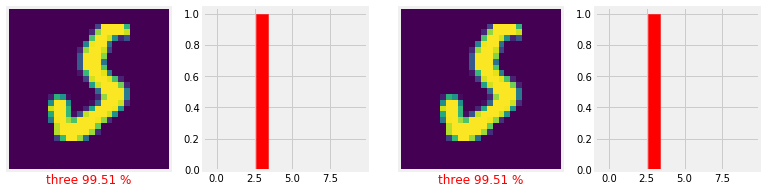

In [27]:
j=0
for i in wrong_predictions:
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,1)
    plottingphoto(i)
    plt.subplot(1,4,2)
    plottingbargraph(i)
    j=j+1
    plt.subplot(1,4,3)
    plottingphoto(i)
    plt.subplot(1,4,4)
    plottingbargraph(i)
    j=j+1
    plt.show()